# Importing libraries

In [1]:
from keras.models import load_model
import tensorflow as tf
from mtcnn.mtcnn import MTCNN
from PIL import Image
from matplotlib import pyplot
import numpy as np
import cv2

print("tensorflow ",tf.__version__)

tensorflow  2.2.0


## Load model

In [4]:
model = load_model("../models/keras/model/facenet_keras.h5", custom_objects={"tf": tf})

#print model input and output shape
print(model.inputs)
print(model.outputs)

[<tf.Tensor 'input_1_1:0' shape=(None, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm_1/Identity:0' shape=(None, 512) dtype=float32>]


# Detect Faces for face recognition using Multitask Cascaded Convolutional Networks

###  1. Load image

In [13]:
image = Image.open("../test.jpg")
image = image.convert('RGB')
pixels = np.asarray(image)

### 2. Detect face in loaded image

In [14]:
detector = MTCNN()
results = detector.detect_faces(pixels)
print(results)

[{'box': [67, 107, 199, 300], 'confidence': 0.9997069239616394, 'keypoints': {'left_eye': (122, 222), 'right_eye': (219, 224), 'nose': (177, 286), 'mouth_left': (124, 334), 'mouth_right': (217, 333)}}]


### 3. Extract face

In [15]:
x1, y1, width, height = results[0]["box"]
x1, y1 = abs(x1), abs(y1)
x2, y2 = x1 + width, y1+height
face = pixels[y1:y2, x1:x2]

### 4. Resize pixels

In [16]:
image = Image.fromarray(face)
image = image.resize((160, 160))
face_array = np.asarray(image)

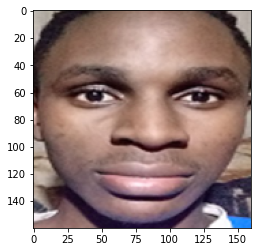

In [17]:
pyplot.imshow(image)

# Face detection using Haar Cascade

### Load image

In [18]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('../haarcascade_frontalface_default.xml')
img = cv2.imread('../test.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### Detect face

In [19]:
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)[0]
print(faces)
image = Image.fromarray(face)

[ 56 131 222 222]


### Resize image

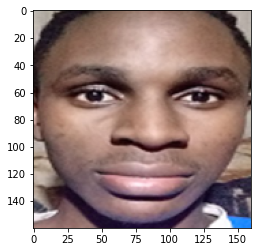

In [20]:
image = image.resize((160, 160))
face_array = np.asarray(image)

# Display image
pyplot.imshow(image)